<a href="https://colab.research.google.com/github/giacomo-monni/isde-mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load MNIST Handwritten Digit data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting function


def load_mnist_data(filename):
  data = pd.read_csv('sample_data/mnist_train_small.csv')
  data = np.array(data)
  y = data[:,0] #we need the first column which has index=0
  x = data[:,1:] / 255
  return x,y
  
filename = 'sample_data/mnist_train_small.csv'

x,y = load_mnist_data(filename)

print(y.shape,x.shape)
print(y, np.max(x))




(19999,) (19999, 784)
[5 7 9 ... 2 9 5] 1.0


In [5]:
# count how many images we have for each class
class_labels = np.unique(y)
print(class_labels.size, class_labels.shape[0])
num_classes = class_labels.size

counts = np.zeros(shape=(10,), dtype=int)

for label in y: 
  counts[label] += 1

for k in range(num_classes):
  counts[k] = (y==k).sum()
  print(k,counts[k])

print(counts.sum())



10 10
0 1962
1 2243
2 1989
3 2021
4 1924
5 1761
6 2038
7 2126
8 1912
9 2023
19999


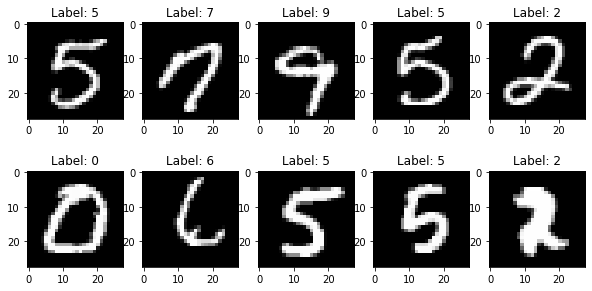

In [6]:
image = x[0,:]

def plot_digit(image,shape=(28,28)):
  plt.imshow(np.reshape(image, newshape=shape), cmap='gray') # an image is a vector, which means that is a column of the vector

#plot_digit(image) 

def plot_ten_digits(x,y=None):
  plt.figure(figsize=(10,5))
  
  for i in range(10):
    plt.subplot(2,5,i+1)
    plot_digit(x[i,:])
    
    if y is not None:
      plt.title('Label: '+ str(y[i]))

plot_ten_digits(x,y)


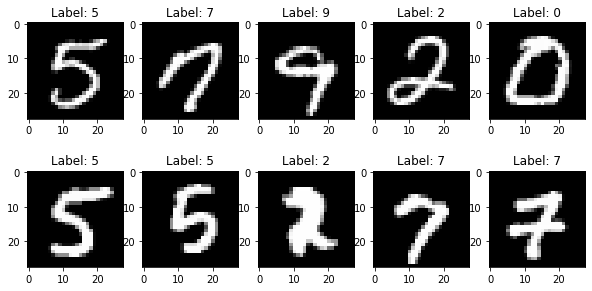

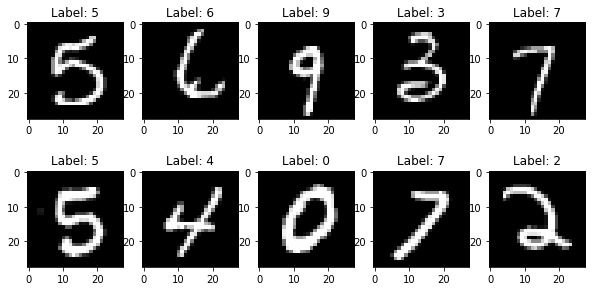

In [27]:

# xtr, ytr, xts ,yts = split_data(x,y,tr_fraction)
def split_data(x,y,tr_fraction = 0.8):
  num_samples = y.size
  num_tr = int(tr_fraction * num_samples)
  num_ts = num_samples - num_tr

  #print(num_tr, num_ts)

  # we generate a cvector of zeros
  tr_idx = np.zeros(shape=num_samples)
  tr_idx[0:num_tr] = 1
 # print(tr_idx)

  # shuffle
  np.random.shuffle(tr_idx) 
#  print(tr_idx)

  # training label
  ytr = y[tr_idx == 1]
  xtr = x[tr_idx == 1, :]

  # test set (this should be false, so we take the elements equal to 0)
  yts = y[tr_idx == 0]
  xts = x[tr_idx == 0, :]

  #print(ytr.shape, xtr.shape, xts.shape)

  return xtr, ytr, xts, yts

xtr, ytr, xts, yts = split_data(x,y)
plot_ten_digits(xtr,ytr)
plot_ten_digits(xts,yts)

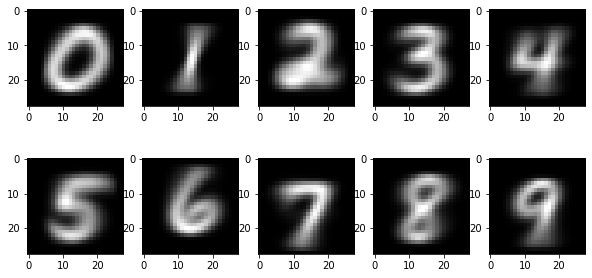

In [8]:
# implement centroids = fit(xtr, ytr)

#matrix: centroid for each number of class
def fit(xtr,ytr):
  num_classes = np.unique(ytr).size
  num_features = xtr.shape[1]
  centroids = np.zeros(shape=(num_classes, num_features))

  for k in range(num_classes):
    xk = xtr[ytr==k,:]
    centroids[k,:] = np.mean(xk, axis=0)
  return centroids


centroids = fit(xtr,ytr)
plot_ten_digits(centroids)

In [23]:
# predict function
# compute distance matrix between testing points and centroids

from sklearn.metrics import pairwise_distances
import time 

print(xts.shape, centroids.shape)

num_ts_samples = xts.shape[0] 
num_centroids = centroids.shape[0]

dist = np.zeros(shape=(num_ts_samples, num_centroids))
dist1 = np.zeros(shape=(num_ts_samples, num_centroids))

t0= time.time()
for i in range(num_ts_samples):
  for j in range(num_centroids):
    dist[i,j] = np.linalg.norm(xts[i,:] - centroids[j,:], ord=2)
t1 = time.time()
print("Elapsed time", t1-t0)

#print(dist, dist.shape)
col = np.linalg.norm(xts - centroids[0,:], ord=2, axis = 1)
#v = xts-centroids[0,:]
print(col.shape)

t0= time.time()
for j in range(num_centroids):
    dist1[:,j] = np.linalg.norm(xts[j,:] - centroids[j,:], ord=2)
t1 = time.time()
print("Elapsed time", t1-t0)

print((dist-dist1 > 1e-12).sum())

t0= time.time()
dist2 = pairwise_distances(xts, centroids)
t1 = time.time()
print("Elapsed time", t1-t0)

y_pred = np.argmin(dist, axis = 1) # it returns the argument that corresponds to the minimum
print(y_pred)
print(yts)



def predict(xts,centroids):
  dist = pairwise_distances(xts, centroids)
  y_pred = np.argmin(dist,axis=1)
  return y_pred

y_pred = predict(xts,centroids)

# measure test error 
def test_error(y_pred,yts):
  return ((y_pred != yts).mean())

print(test_error(y_pred,yts))

(4000, 784) (10, 784)
Elapsed time 0.3471665382385254
(4000,)
Elapsed time 0.001520395278930664
26248
Elapsed time 0.016515493392944336
[6 7 7 ... 6 1 9]
[6 7 7 ... 6 1 9]
0.20275


In [29]:
# implement the full pipeline. Input: X, y ----> Output: mean_test_error, std_dev
x,y = load_mnist_data(filename)

n_rep = 100
ts_error = np.zeros(shape=(n_rep,))

for rep in range(n_rep):
  xtr,ytr,xts, yts= split_data(x,y)
  centroids = fit(xtr, ytr)
  y_pred = predict(xts, centroids)
  ts_error[rep] = test_error(y_pred, yts)

print(ts_error.mean(), 2*ts_error.std())

0.19240750000000006 0.011469231665634806
